In [1]:
#This notebook makes position plots

In [35]:
import sys
sys.path.insert(0,'../MixingAnglePlots')
from MixingAngle_vs_Yield_Plot import decay_in_MATHUSLA 
sys.path.insert(0,'../../FastSim_Additions')
from Additions import initiate_detector

In [1]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import pickle

In [2]:
filename = 'Finished_Sim_Ue/sim_Ue_Bmeson_1.1283_1.9306977288832498e-06.pickle'
with open(filename, 'rb') as f:
    data = pickle.load(f)['Data']

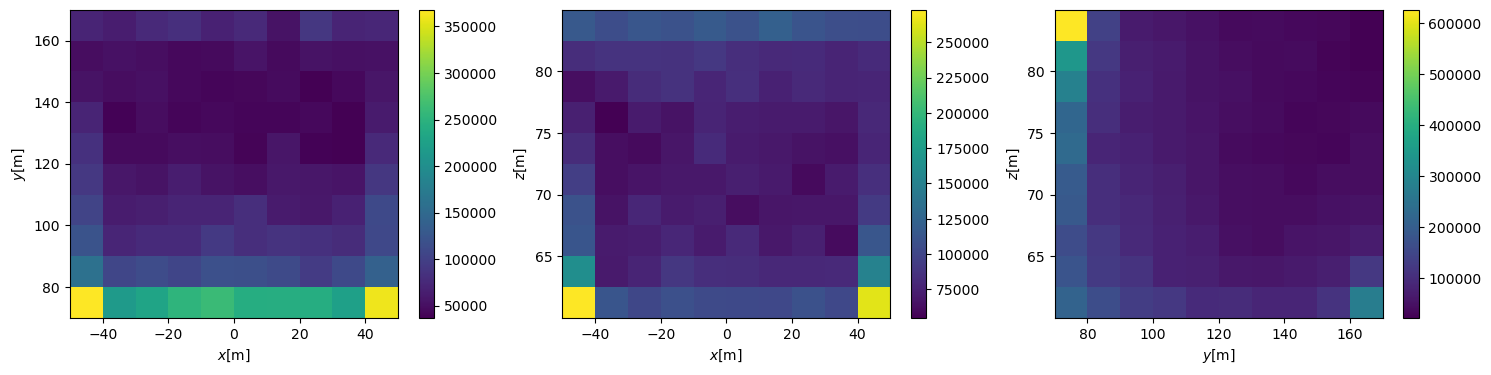

In [3]:
position = data['position']

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (3 * 6,4))

axis_lab = [r'$x$ [m]', r'$y$ [m]', r'$z$ [m]']

for i,ind_pair in enumerate([(0,1),(0,2),(1,2)]):
    h = ax[i].hist2d(position[:,ind_pair[0]], position[:, ind_pair[1]], weights = data['weight'])

    fig.colorbar(h[3], ax = ax[i])
    ax[i].set_xlabel(axis_lab[ind_pair[0]])
    ax[i].set_ylabel(axis_lab[ind_pair[1]])

In [3]:
from weight_corrector import main as correction

In [4]:
reweight = correction(filename)

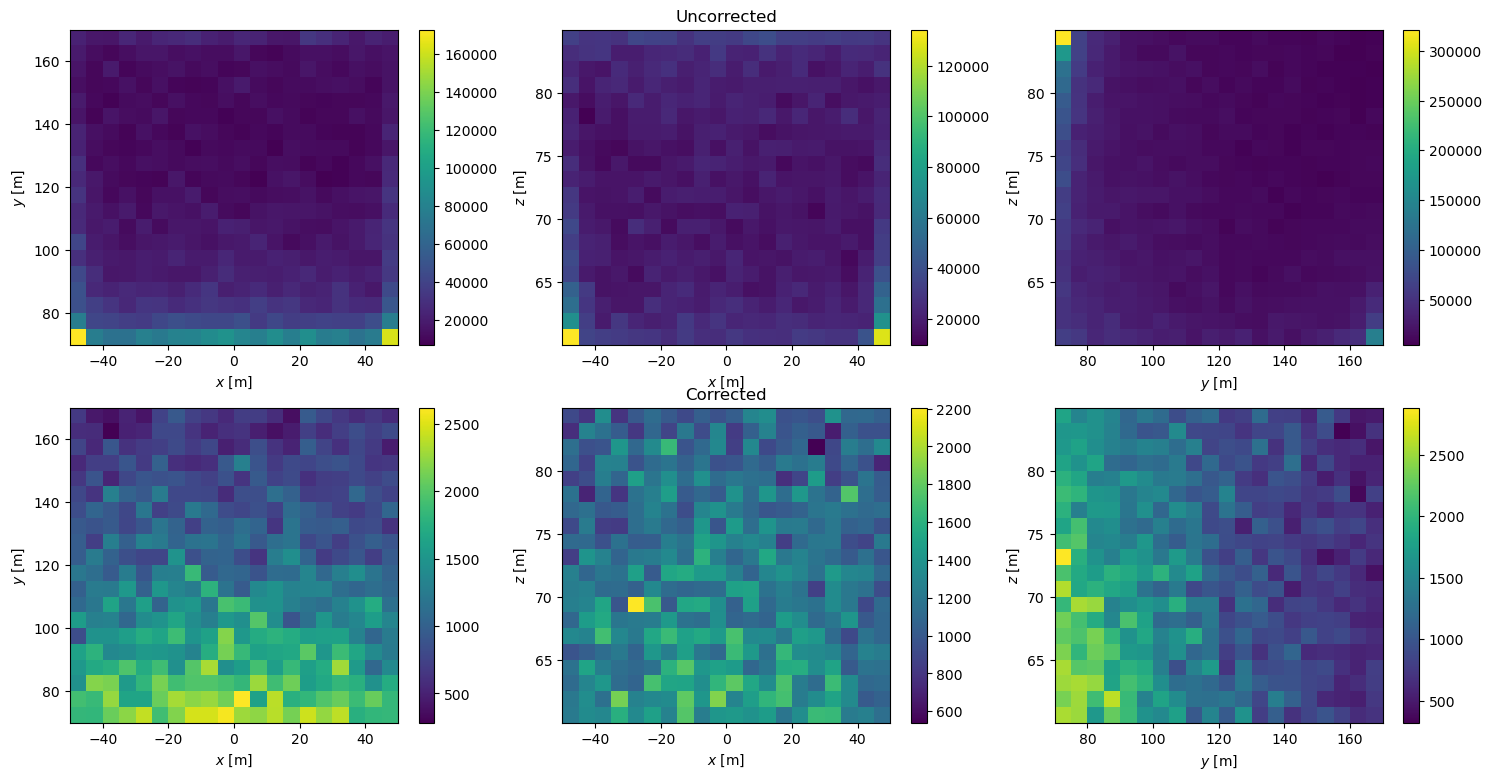

In [12]:
position = data['position']

axis_lab = [r'$x$ [m]', r'$y$ [m]', r'$z$ [m]']

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (3 * 6,2 * 4 + 1))

for i,ind_pair in enumerate([(0,1),(0,2),(1,2)]):
    h0 = ax[0,i].hist2d(position[:,ind_pair[0]], position[:, ind_pair[1]], weights = data['weight'], bins = 20)
    
    h1 = ax[1,i].hist2d(position[:,ind_pair[0]], position[:, ind_pair[1]], weights = reweight, bins = 20)

    fig.colorbar(h0[3], ax = ax[0,i])
    ax[0,i].set_xlabel(axis_lab[ind_pair[0]])
    ax[0,i].set_ylabel(axis_lab[ind_pair[1]])
    
    fig.colorbar(h1[3], ax = ax[1,i])
    ax[1,i].set_xlabel(axis_lab[ind_pair[0]])
    ax[1,i].set_ylabel(axis_lab[ind_pair[1]])
    
ax[0,1].set_title('Uncorrected')
ax[1,1].set_title('Corrected')

plt.savefig('CorrectedvsUncorrected.pdf')

In [18]:
h1[2]

In [40]:
d = initiate_detector()
in_detector = np.array([decay_in_MATHUSLA(d, p_pos) for p_pos in position])

Text(0.5, 1.0, 'Corrected')

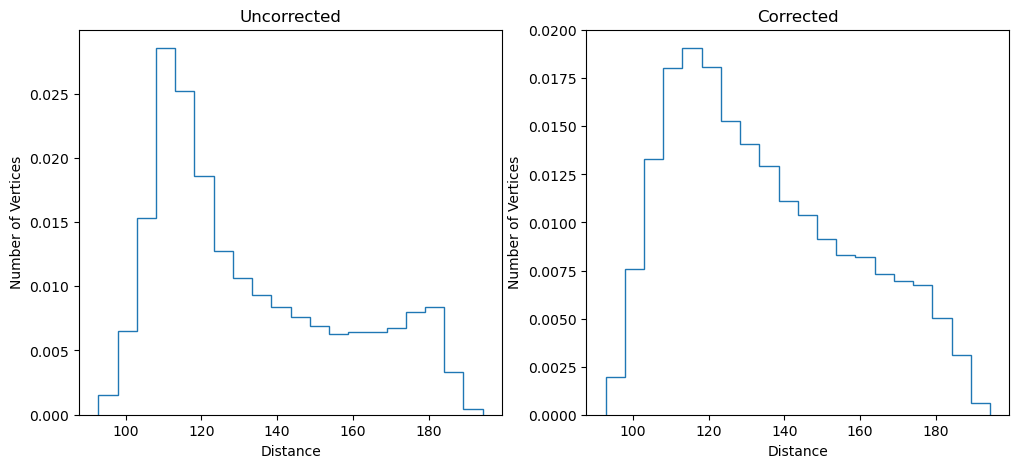

In [29]:
position = data['position']

axis_lab = [r'$x$ [m]', r'$y$ [m]', r'$z$ [m]']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (2 * 6,1 * 4 + 1))

radial = np.linalg.norm(position, axis = 1)

h1 = ax[0].hist(radial,bins = 20, weights = data['weight'], histtype = 'step', density = True)
h2 = ax[1].hist(radial, bins = 20, weights = reweight, histtype = 'step', density = True)

ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Number of Vertices')
ax[1].set_xlabel('Distance')
ax[1].set_ylabel('Number of Vertices')
    
ax[0].set_title('Uncorrected')
ax[1].set_title('Corrected')

#ax[0].set_yscale('log')
#ax[1].set_yscale('log')

#plt.savefig('CorrectedvsUncorrected_1dlog.pdf')

In [30]:
np.sum(h1[0] * np.diff(h1[1])[0])

0.9999999999999991

In [31]:
np.sum(h2[0] * np.diff(h2[1])[0])

0.9999999999999992

Text(0.5, 1.0, 'Corrected')

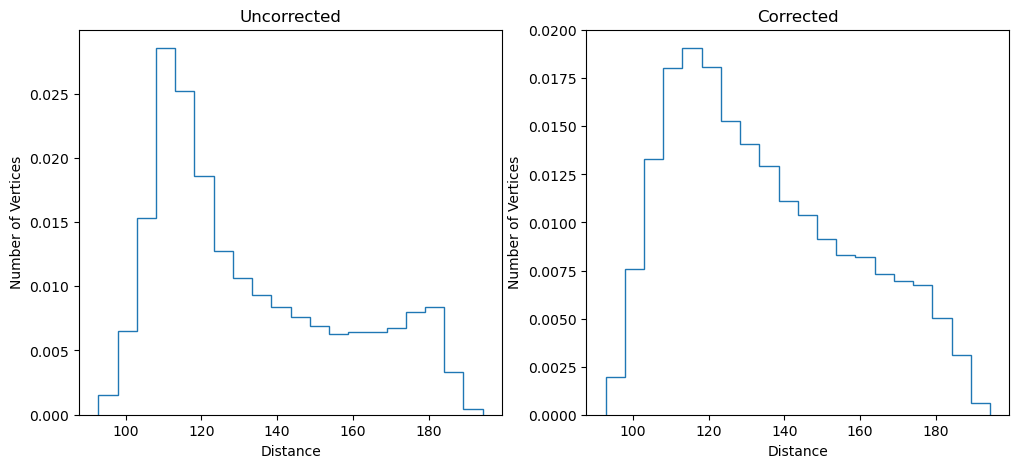

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (2 * 6,1 * 4 + 1))

radial = np.linalg.norm(position, axis = 1)

h1 = ax[0].hist(radial[in_detector],bins = 20, weights = data['weight'][in_detector], histtype = 'step', density = True)
h2 = ax[1].hist(radial[in_detector], bins = 20, weights = reweight[in_detector], histtype = 'step', density = True)

ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Number of Vertices')
ax[1].set_xlabel('Distance')
ax[1].set_ylabel('Number of Vertices')
    
ax[0].set_title('Uncorrected')
ax[1].set_title('Corrected')

In [43]:
in_detector.sum() == len(in_detector)

True

In [44]:
from get_weight_emulator import main